In [3]:
import os

import pandas as pd
import numpy as np
import squidpy as sq
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [4]:
import mushroom.data.xenium as xenium

In [78]:
adata = xenium.adata_from_xenium('/data/estorrs/sandbox/HT413C1_U2_xenium.h5ad')
adata

AnnData object with n_obs × n_vars = 105239 × 477
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'integrated_neighborhood', 'xenium_neighborhood', 'multiplex_neighborhood', 'he_neighborhood'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial', 'spatial_original'

In [82]:
metadata = pd.read_csv('/data/estorrs/sandbox/HT413C1-Th1K4A1Us1_2_celltype.tsv', sep='\t', index_col=0)
adata.obs = pd.merge(adata.obs, metadata, left_index=True, right_index=True, how='left')
adata.obs

,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,integrated_neighborhood,xenium_neighborhood,multiplex_neighborhood,he_neighborhood,celltype
cell_id,,,,,,,,,,,,,,,
aaaakgka-1,846.782349,1269.916504,106,0,0,0,0,106,37.840939,28.809689,6,7,0,7,Tumor
aaabamlb-1,836.795288,1271.207642,84,0,0,0,0,84,37.253908,17.836719,2,5,13,11,Tumor
aaabjphp-1,856.417542,1271.678833,78,0,0,0,0,78,70.037346,25.829376,6,7,0,7,Tumor
aaabkneo-1,823.391846,1271.286011,266,0,0,0,0,266,113.387348,63.038127,2,5,13,11,Doublet
aaacddce-1,848.736084,1274.679199,72,0,0,0,0,72,28.222657,25.603595,6,7,0,7,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
oioldpbf-1,3395.203857,2593.349121,388,0,0,0,0,388,241.360165,28.448439,17,7,17,6,Hepatocyte
oiolgmmf-1,3351.407227,2559.825684,290,0,0,0,0,290,111.310160,37.253908,12,0,18,4,Hepatocyte
oiombkbi-1,3387.867432,2560.065918,179,0,0,0,0,179,83.042347,19.146251,17,7,17,6,Hepatocyte


In [83]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=5)

In [84]:
adata.layers["counts"] = adata.X.copy()
# sc.pp.normalize_total(adata, inplace=True) # this makes too many genes zero
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


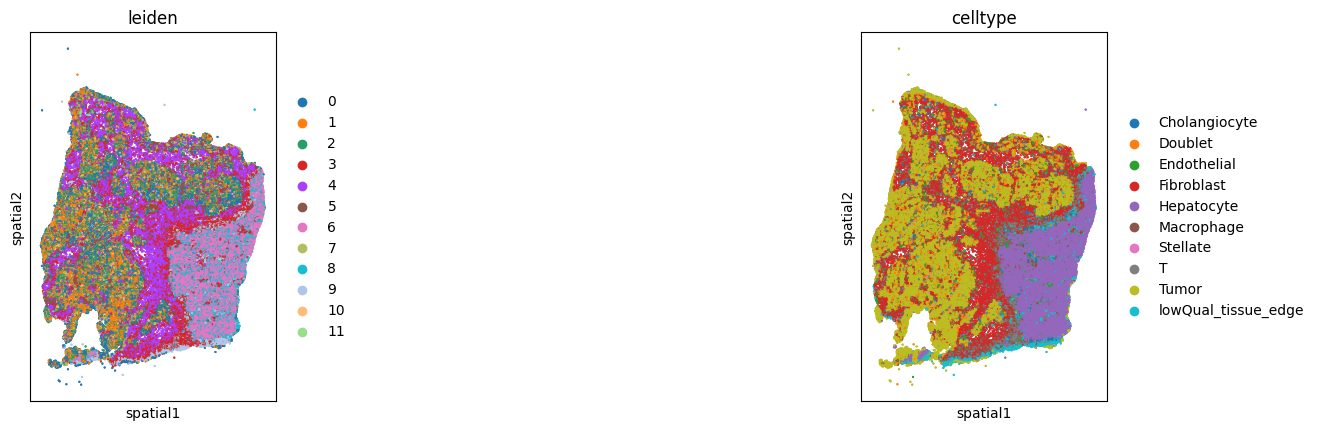

In [85]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "leiden", 'celltype'
    ],
    wspace=0.4,
)

In [86]:
labels, counts = np.unique(adata.obs['integrated_neighborhood'], return_counts=True)
keep = [label for label, count in zip(labels, counts) if count > 10]
print(keep)
mask = np.asarray([True if c in keep else False for c in adata.obs['integrated_neighborhood']])
filtered = adata[mask]
filtered.shape, np.count_nonzero(mask)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2', '3', '4', '5', '6', '7', '8', '9']


((103627, 477), 103627)

In [87]:
filtered.X.shape, adata.X.shape

((103627, 477), (103629, 477))

In [88]:
sc.tl.rank_genes_groups(filtered, groupby='integrated_neighborhood', method='wilcoxon')

/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes fo

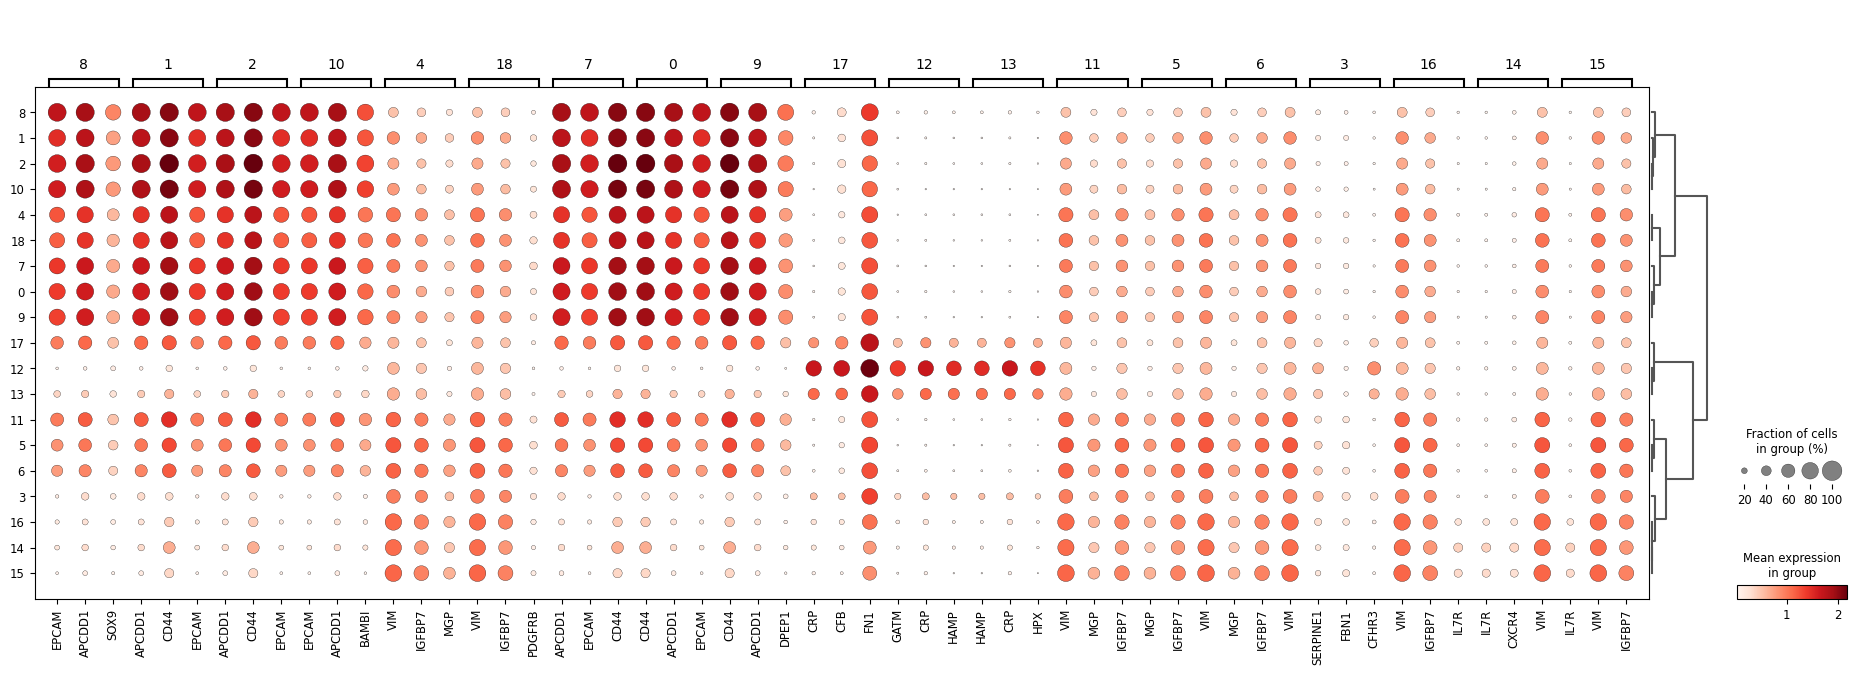

In [90]:
sc.pl.rank_genes_groups_dotplot(filtered, n_genes=3, )

In [94]:
# cell fraction barplot
import altair as alt
from collections import Counter

In [126]:
def get_count_df(adata, col, cmap='Reds', order=None):
    nbhds = sorted(set(adata.obs[col]))
    cell_types = sorted(set(adata.obs['celltype']))
    data = []
    for nbhd in nbhds:   
        f = adata[adata.obs[col]==nbhd]
        counts = Counter(f.obs['celltype'].to_list())
        data.append([counts.get(c, 0) / f.shape[0] for c in cell_types])
    df = pd.DataFrame(data=data, columns=cell_types, index=nbhds)
    if order is None:
        cg = sns.clustermap(df, cmap=cmap)
    else:
        cg = sns.clustermap(df[order], col_cluster=False, cmap=cmap)
    return cg

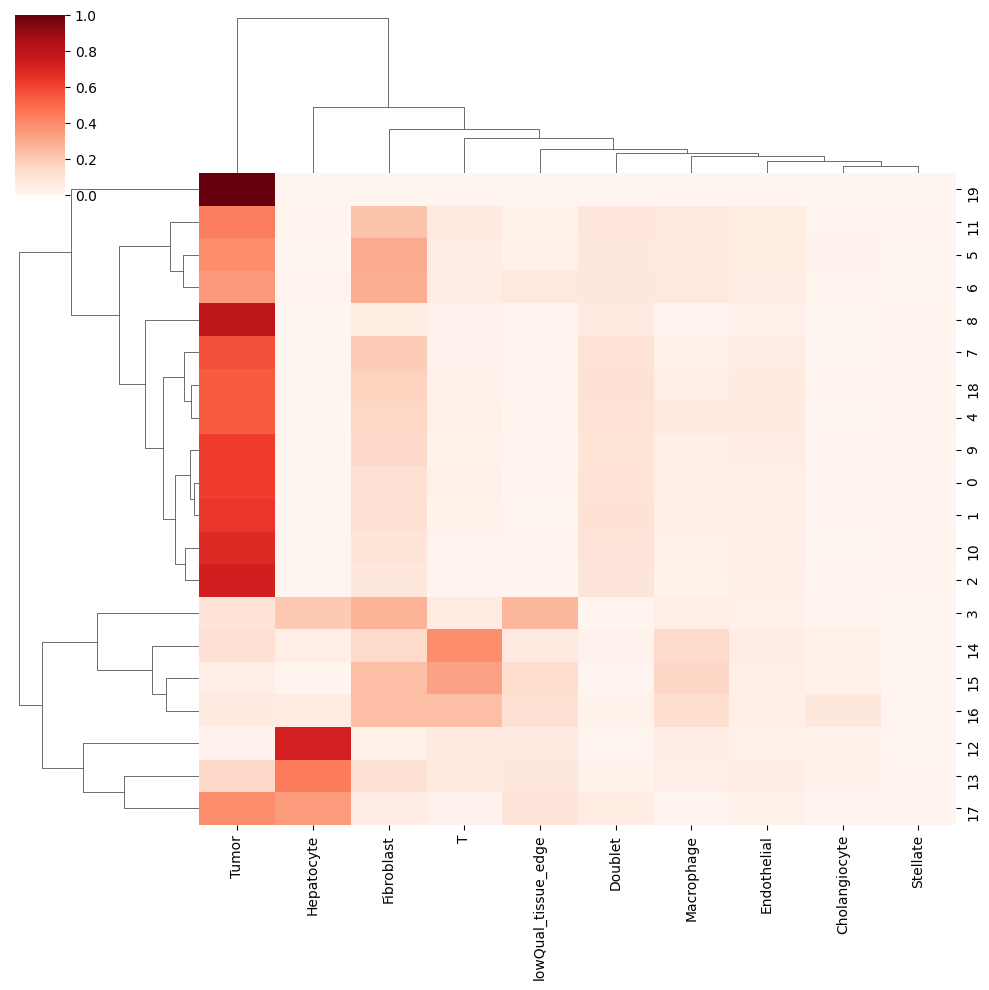

In [127]:
col = 'integrated_neighborhood'
cg = get_count_df(adata, col, cmap='Reds')
order = df.columns[cg.dendrogram_col.dendrogram['leaves']]   
    

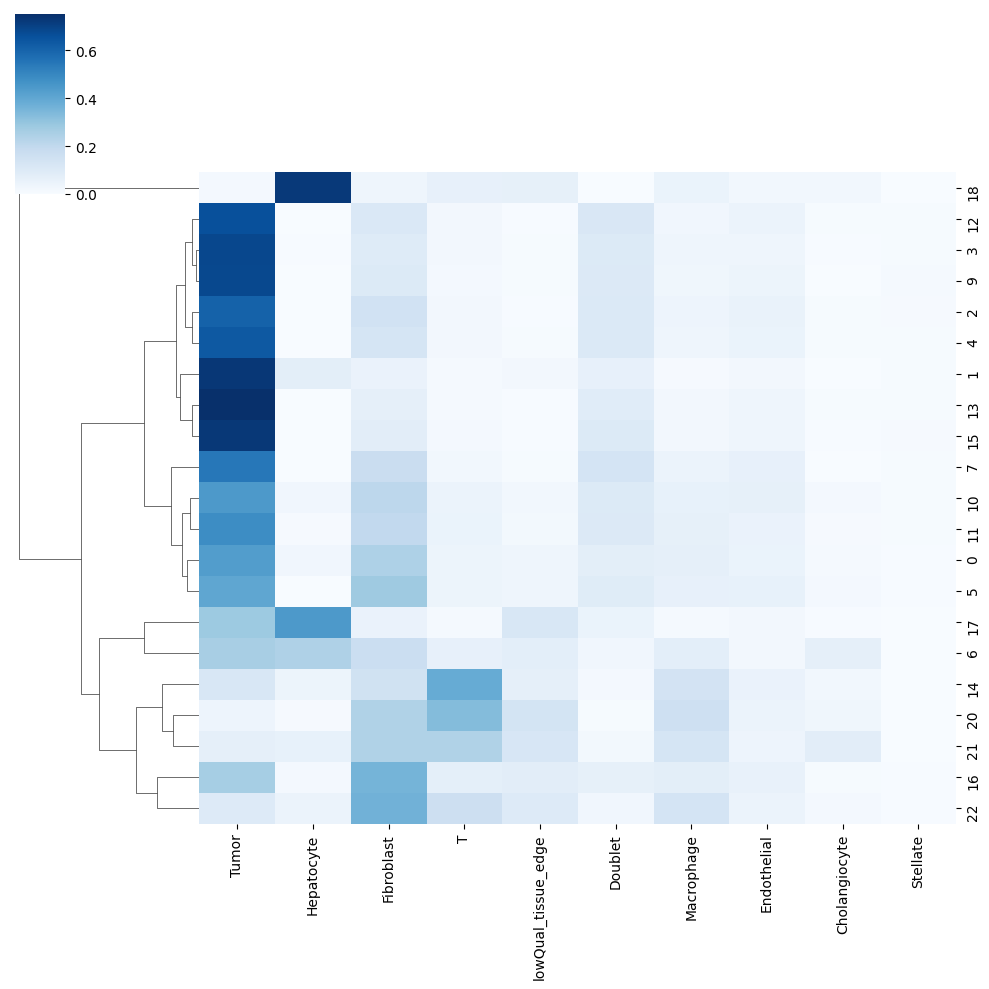

In [128]:
col = 'multiplex_neighborhood'
cg = get_count_df(adata, col, cmap='Blues', order=order)

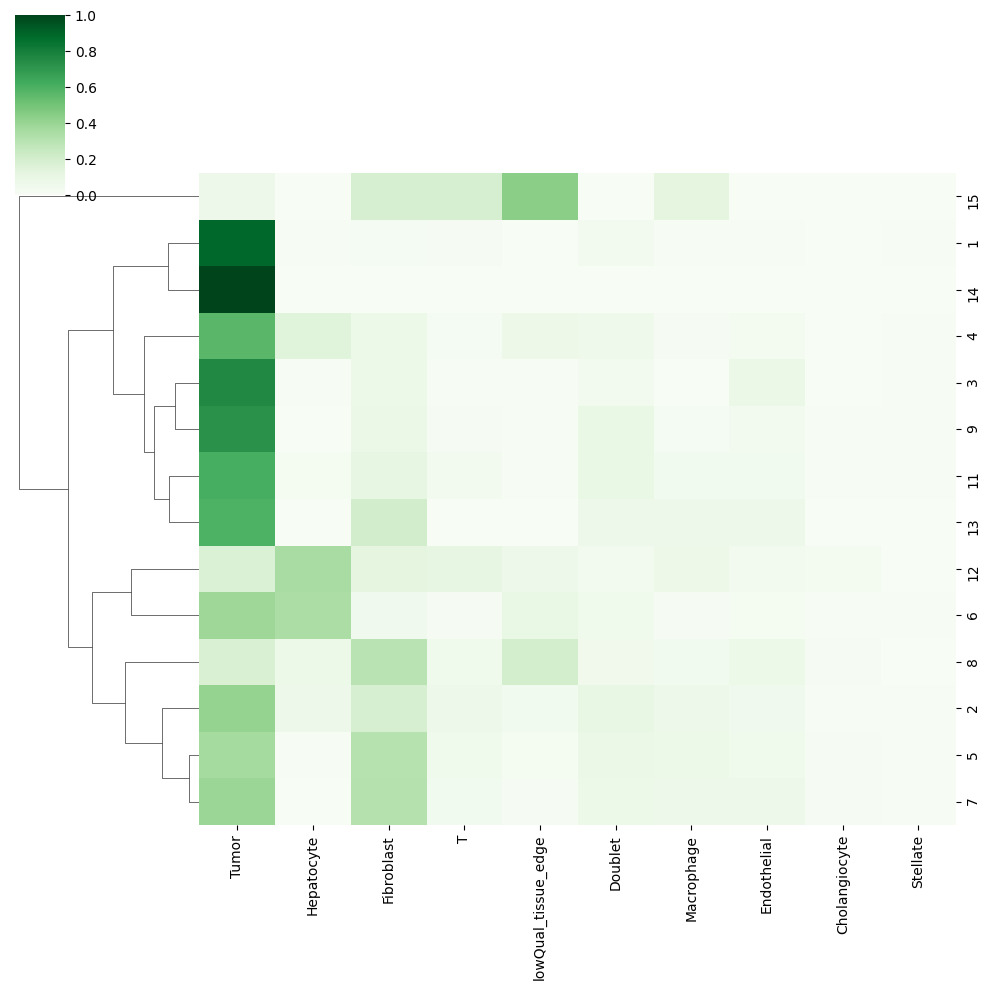

In [129]:
col = 'he_neighborhood'
cg = get_count_df(adata, col, cmap='Greens', order=order)

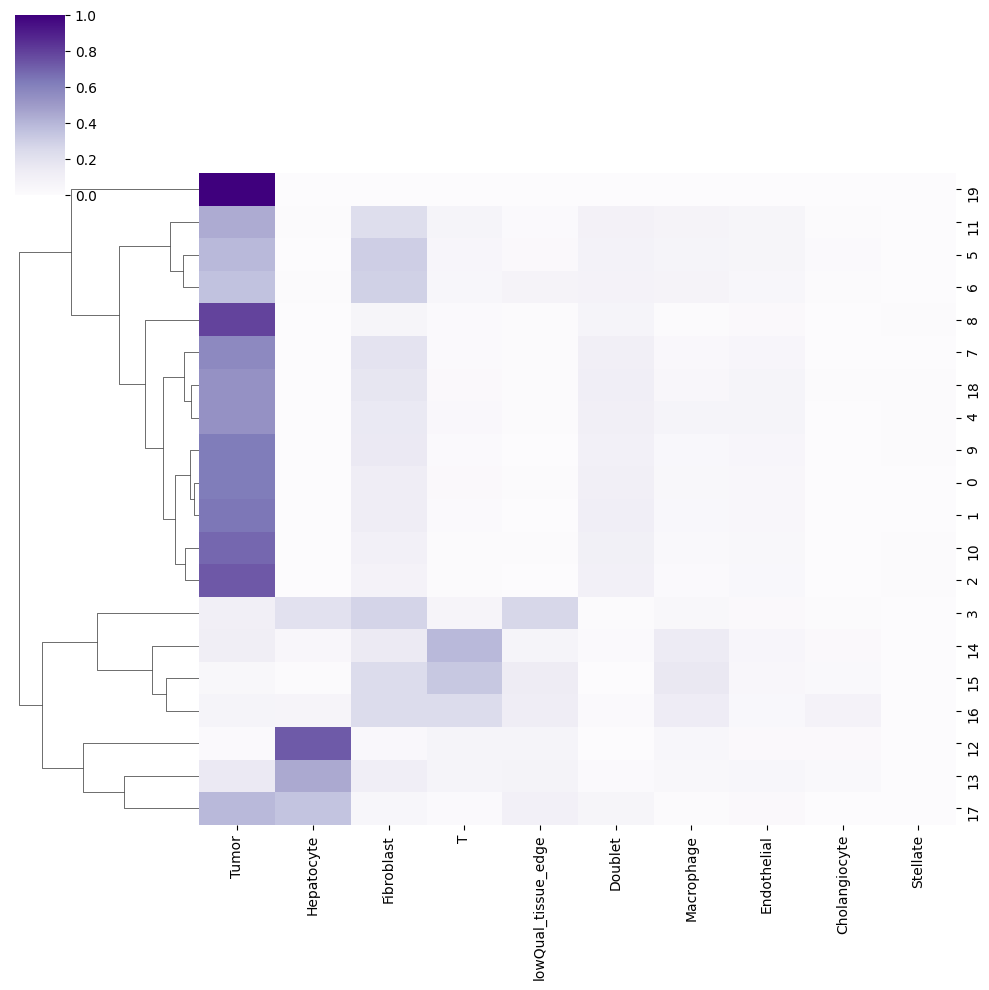

In [131]:
col = 'integrated_neighborhood'
cg = get_count_df(adata, col, cmap='Purples', order=order)

categories: 0, 1, 2, etc.
var_group_labels: 12


/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of

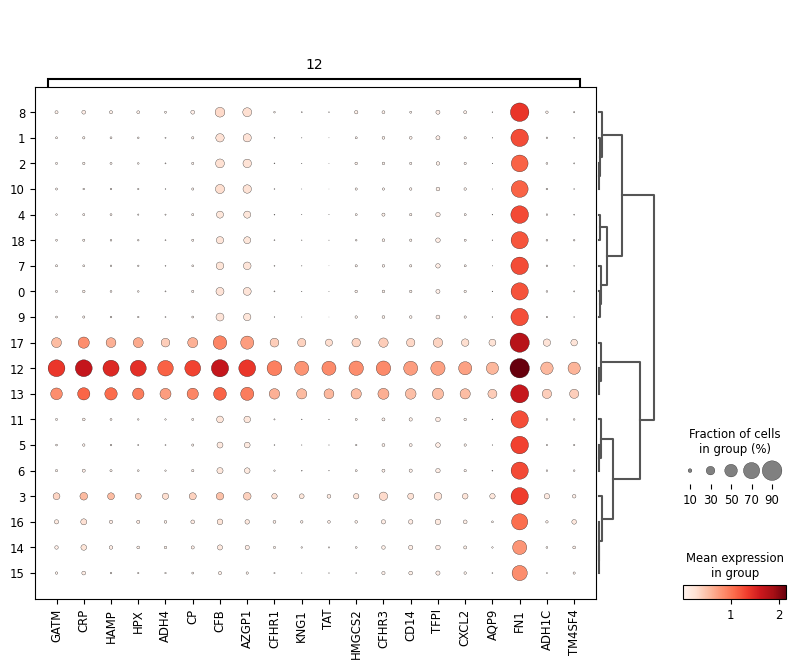

In [134]:
sc.pl.rank_genes_groups_dotplot(filtered, n_genes=20, groups=['12'])

In [138]:
n = 10
filtered.uns['rank_genes_groups']['names']['12'][:n]

array(['GATM', 'CRP', 'HAMP', 'HPX', 'ADH4', 'CP', 'CFB', 'AZGP1',
       'CFHR1', 'KNG1'], dtype=object)

In [135]:
import enrichrpy.enrichr as een
import enrichrpy.plotting as epl

In [139]:
n = 10
genes = filtered.uns['rank_genes_groups']['names']['12'][:n]
df = een.get_pathway_enrichment(genes, gene_set_library='PanglaoDB_Augmented_2021')
epl.enrichment_dotplot(df, n=10, hue='Z-score', log=True)

alt.LayerChart(...)

In [140]:
fp = '/data/estorrs/sandbox/HT413C1_Th1k4A1_U3_spatial_features.txt'
df = pd.read_csv(fp, sep='\t', index_col=0)
df

,row,col,bbox-r1,bbox-c1,bbox-r2,bbox-c2,area,CCL2_fraction,CCL2_intensity,CCL2_intensity_scaled,...,Podoplanin_fraction,Podoplanin_intensity,Podoplanin_intensity_scaled,SMA_fraction,SMA_intensity,SMA_intensity_scaled,SOX9_fraction,SOX9_intensity,SOX9_intensity_scaled,cell_type
label,,,,,,,,,,,,,,,,,,,,,
1,13.144235,1972.354157,0,1906,30,2023,2177.0,0.071658,0.073036,0.004155,...,0.054203,0.055122,0.009398,0.000000,0.000459,0.000009,0.018833,0.019752,0.002398,Stroma
2,14.023246,2546.876553,0,2480,31,2602,2495.0,0.063327,0.065731,0.003739,...,0.048497,0.051303,0.008746,0.000000,0.001603,0.000032,0.022846,0.023246,0.002823,Unlabeled
3,10.393316,2735.958355,0,2671,24,2785,1945.0,0.068895,0.068895,0.003919,...,0.067352,0.071465,0.012184,0.000000,0.003599,0.000073,0.019537,0.020051,0.002435,Stroma
4,12.390164,3881.186885,0,3824,28,3926,1830.0,0.086339,0.089071,0.005067,...,0.024590,0.024590,0.004192,0.000000,0.022404,0.000452,0.009836,0.009836,0.001194,Unlabeled
5,12.159021,4657.212757,0,4592,27,4710,2289.0,0.106160,0.110529,0.006287,...,0.025775,0.027960,0.004767,0.000000,0.017912,0.000361,0.012232,0.013543,0.001644,Unlabeled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70230,8218.455882,5330.892157,8210,5323,8227,5339,204.0,1.000000,22.338235,1.270678,...,0.637255,2.573529,0.438754,0.000000,4.857843,0.097908,0.740196,4.078431,0.495194,Epithelial
70231,8219.476071,5469.702771,8206,5453,8229,5487,397.0,1.000000,12.488665,0.710400,...,0.088161,0.181360,0.030920,0.002519,4.753149,0.095798,0.209068,0.821159,0.099703,Macrophage - M1
70232,8223.500000,5406.750000,8219,5402,8229,5412,72.0,1.000000,10.472222,0.595697,...,0.083333,0.138889,0.023679,0.000000,3.347222,0.067462,0.375000,1.138889,0.138281,Epithelial


In [143]:
import mushroom.registration.bigwarp as bigwarp
ddf = bigwarp.read_bigwarp_warp_field(
    '/data/estorrs/sandbox/s6_ddf.tif', .2)
ddf.shape

torch.Size([2, 5085, 3640])

In [163]:
pts = df[['row', 'col']].values
warped_pts, mask = bigwarp.warp_pts(pts, ddf)
warped_pts, mask = warped_pts.numpy(), mask.numpy()
warped_pts.shape

(70082, 2)

In [164]:
df = df[mask]
df['x'] = warped_pts[:, 1]
df['y'] = warped_pts[:, 0]

/tmp/ipykernel_3325921/1903504305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = warped_pts[:, 1]
/tmp/ipykernel_3325921/1903504305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = warped_pts[:, 0]


(-91.55000000000001, 3660.55, 5315.2, 184.79999999999998)

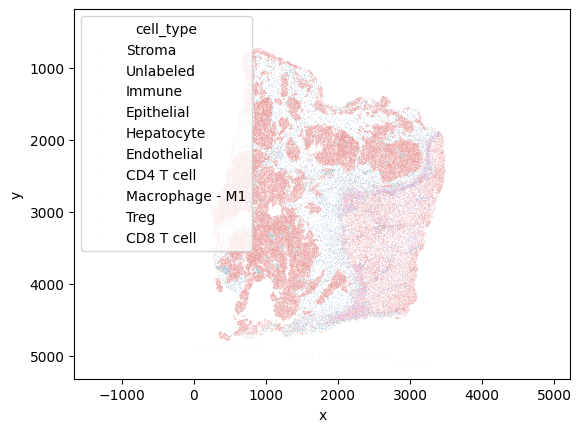

In [224]:
sns.scatterplot(data=df, x='x', y='y', hue='cell_type', s=.1)
plt.gca().invert_yaxis()
plt.axis('equal')

(-91.55000000000001, 3660.55, 5315.2, 184.79999999999998)

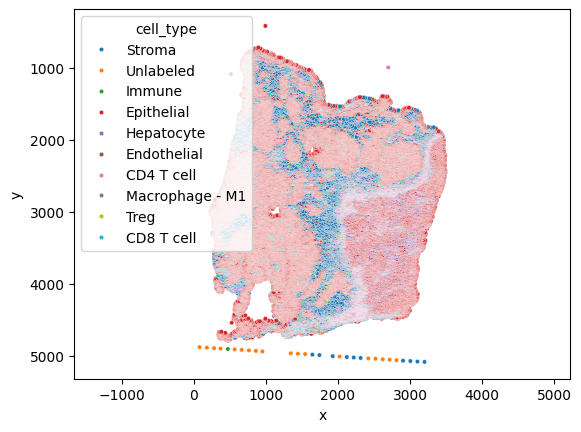

In [223]:
sns.scatterplot(data=df, x='x', y='y', hue='cell_type', s=10.)
plt.gca().invert_yaxis()
plt.axis('equal')

In [216]:
from mushroom.mushroom import Mushroom
new = Mushroom.from_config(
    '/data/estorrs/mushroom/data/projects/htan_talk/mushroom/HT413C1_Th1k4A1_2024-01-29_21_25_55_078492/outputs',
    accelerator='cpu',
)

INFO:root:loading spore for he
INFO:root:starting he processing
INFO:root:14 sections detected: ['s0', 's1', 's4', 's7', 's8', 's10', 's11', 's12', 's15', 's16', 's17', 's20', 's23', 's24']
INFO:root:processing sections
INFO:root:generating image data for section s0
INFO:root:generating image data for section s1
INFO:root:generating image data for section s4
INFO:root:generating image data for section s7
INFO:root:generating image data for section s8
INFO:root:generating image data for section s10
INFO:root:generating image data for section s11
INFO:root:generating image data for section s12
INFO:root:generating image data for section s15
INFO:root:generating image data for section s16
INFO:root:generating image data for section s17
INFO:root:generating image data for section s20
INFO:root:generating image data for section s23
INFO:root:generating image data for section s24
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 14 sections detec

Predicting: |                                                                                                 …

INFO:root:embedding multiplex spore


Predicting: |                                                                                                 …

INFO:root:embedding xenium spore


Predicting: |                                                                                                 …

In [217]:
new.section_ids

[('s0', 'he'),
 ('s1', 'he'),
 ('s2', 'xenium'),
 ('s3', 'multiplex'),
 ('s4', 'he'),
 ('s5', 'xenium'),
 ('s6', 'multiplex'),
 ('s7', 'he'),
 ('s8', 'he'),
 ('s9', 'xenium'),
 ('s10', 'he'),
 ('s11', 'he'),
 ('s12', 'he'),
 ('s13', 'xenium'),
 ('s14', 'multiplex'),
 ('s15', 'he'),
 ('s16', 'he'),
 ('s17', 'he'),
 ('s19', 'multiplex'),
 ('s20', 'he'),
 ('s21', 'xenium'),
 ('s22', 'multiplex'),
 ('s23', 'he'),
 ('s24', 'he'),
 ('s25', 'multiplex'),
 ('s26', 'multiplex')]

In [218]:
# level = 1
# z_scaler = .1
# resolution = 2.
# weights = {
#     'multiplex': 2.,
#     'he': 2.,
#     'xenium': 1.
# }
# dtype_to_volume = new.generate_interpolated_volumes(
#     z_scaler=z_scaler, level=level, resolution=resolution, dtype_to_weight=weights, dist_thresh=.4, kernel_size=None)
# new.display_volumes(positions=[1,2,3], figsize=(8, 6))

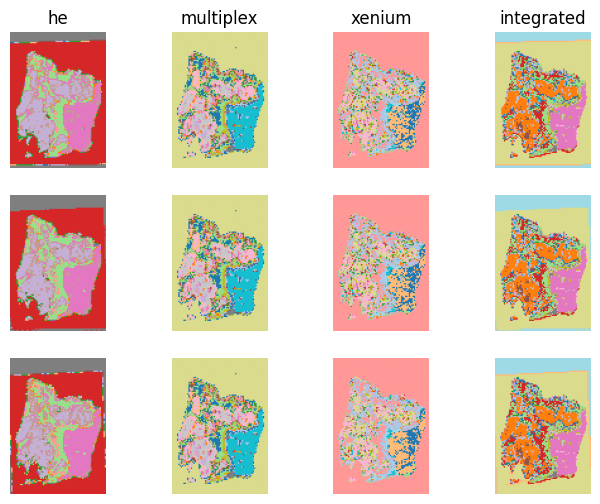

In [220]:
new.display_volumes(positions=[1,2,3], figsize=(8, 6))

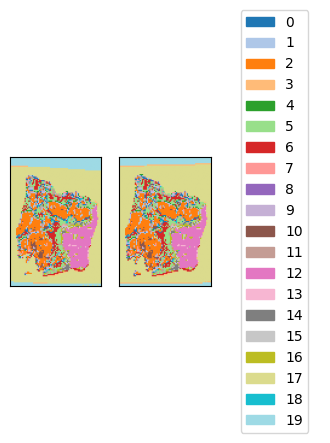

In [219]:
new.display_clusters('integrated', section_idxs=[0,1], level=1)

In [211]:
level = 1
pts = df[['x', 'y']].values
df['integrated_neighborhood'] = [str(i) for i in new.assign_pts(pts, ('s6', 'multiplex'), 'integrated', level=level)]
df['xenium_neighborhood'] = [str(i) for i in new.assign_pts(pts, ('s6', 'multiplex'), 'xenium', level=level, use_volume=True)]
df['multiplex_neighborhood'] = [str(i) for i in new.assign_pts(pts, ('s6', 'multiplex'), 'multiplex', use_volume=True, level=level)]
df['he_neighborhood'] = [str(i) for i in new.assign_pts(pts, ('s6', 'multiplex'), 'he', use_volume=True, level=level)]
df

/tmp/ipykernel_3325921/2958618786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['integrated_neighborhood'] = [str(i) for i in new.assign_pts(pts, ('s6', 'multiplex'), 'integrated', level=level)]
/tmp/ipykernel_3325921/2958618786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xenium_neighborhood'] = [str(i) for i in new.assign_pts(pts, ('s6', 'multiplex'), 'xenium', level=level, use_volume=True)]
/tmp/ipykernel_3325921/2958618786.py:5: SettingWithCopyWarning: 
A value is trying to be set on

,row,col,bbox-r1,bbox-c1,bbox-r2,bbox-c2,area,CCL2_fraction,CCL2_intensity,CCL2_intensity_scaled,...,SOX9_intensity,SOX9_intensity_scaled,cell_type,x,y,integrated_neighborhood,xenium_neighborhood,multiplex_neighborhood,he_neighborhood,highlight
label,,,,,,,,,,,,,,,,,,,,,
1,13.144235,1972.354157,0,1906,30,2023,2177.0,0.071658,0.073036,0.004155,...,0.019752,0.002398,Stroma,2315,5027,3,7,17,4,no
2,14.023246,2546.876553,0,2480,31,2602,2495.0,0.063327,0.065731,0.003739,...,0.023246,0.002823,Unlabeled,2024,5007,3,7,17,3,no
3,10.393316,2735.958355,0,2671,24,2785,1945.0,0.068895,0.068895,0.003919,...,0.020051,0.002435,Stroma,1928,5002,3,7,17,4,no
4,12.390164,3881.186885,0,3824,28,3926,1830.0,0.086339,0.089071,0.005067,...,0.009836,0.001194,Unlabeled,1346,4962,17,7,17,6,no
5,12.159021,4657.212757,0,4592,27,4710,2289.0,0.106160,0.110529,0.006287,...,0.013543,0.001644,Unlabeled,952,4936,17,7,17,6,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70230,8218.455882,5330.892157,8210,5323,8227,5339,204.0,1.000000,22.338235,1.270678,...,4.078431,0.495194,Epithelial,921,734,17,17,17,6,no
70231,8219.476071,5469.702771,8206,5453,8229,5487,397.0,1.000000,12.488665,0.710400,...,0.821159,0.099703,Macrophage - M1,851,729,17,17,0,6,no
70232,8223.500000,5406.750000,8219,5402,8229,5412,72.0,1.000000,10.472222,0.595697,...,1.138889,0.138281,Epithelial,883,729,17,17,0,6,no


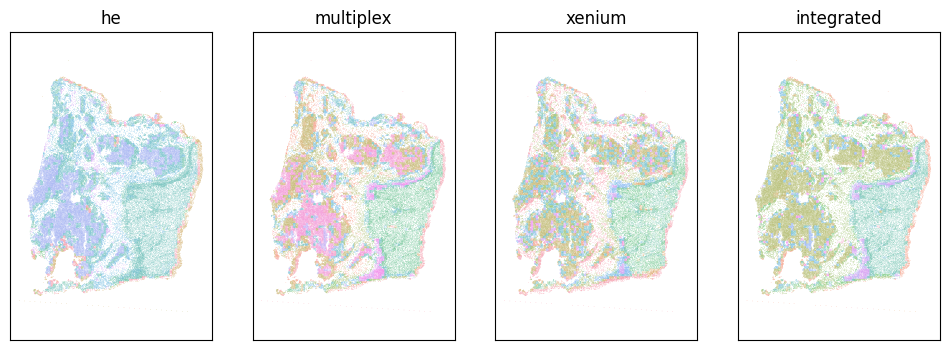

In [212]:
fig, axs = plt.subplots(ncols=4, figsize=(12, 4))
for ax, name in zip(axs, ['he', 'multiplex', 'xenium', 'integrated']):
    sns.scatterplot(data=df, x='x', y='y',
                    hue=f'{name}_neighborhood', s=.1, ax=ax, legend=None)
    ax.invert_yaxis()
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(name)


/tmp/ipykernel_3325921/2503148939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['highlight'] = ['yes' if x=='12' else 'no' for x in df['integrated_neighborhood']]


(-91.55000000000001, 3660.55, 5315.2, 184.79999999999998)

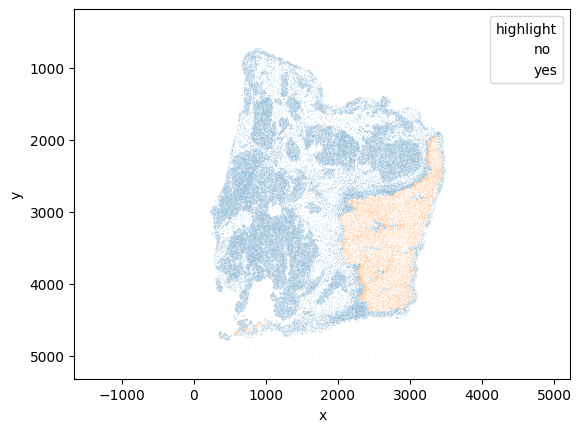

In [213]:
df['highlight'] = ['yes' if x=='12' else 'no' for x in df['integrated_neighborhood']]
sns.scatterplot(data=df, x='x', y='y', hue='highlight', s=.1)
plt.gca().invert_yaxis()
plt.axis('equal')

In [214]:
channels = ['Pan-Cytokeratin',
 'HLA-DR',
 'CD8',
 'SMA',
 'CD45',
 'Hep-Par-1',
 'CD31',
 'E-cadherin',
 'CD11b',
 'FOXP3',
 'CK7',
 'CD68',
 'CD4',
 'CD3e']

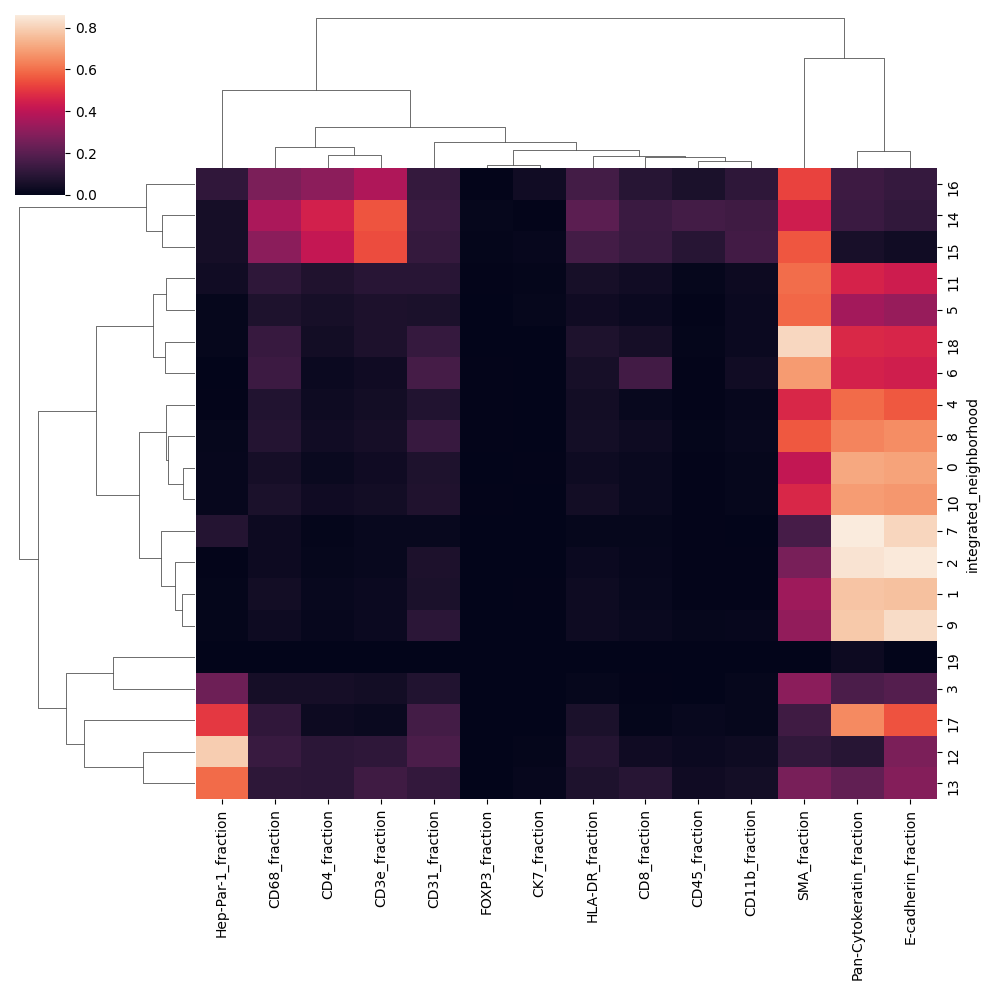

In [215]:
col = 'integrated_neighborhood'
cols = [f'{c}_fraction' for c in channels]
cols += [col]
hm = df[cols].groupby(col).mean()
sns.clustermap(hm)